Demonstration of NGD in two neurons system
adapated from HMM_GA_01
20200414 created by CKC

In [80]:
from timeit import default_timer as timer
import numpy as np
from random import gauss
from math import sqrt
import matplotlib as mpl
mpl.use('nbagg')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# using numpy's histogram2d to calculate the mutual information between two sequences
def mi_quick(a,b,d,bn=25):
    if d>0: xy,_,_ = np.histogram2d(a[d:],b[:-d],bn)
    elif d<0: xy,_,_ = np.histogram2d(a[:d],b[-d:],bn)
    else: xy,_,_ = np.histogram2d(a,b,bn)
    xy /= np.sum(xy)
    px = [np.array([max(x,1e-100) for x in np.sum(xy,axis=0)])]
    py = np.transpose([[max(x,1e-100) for x in np.sum(xy,axis=1)]])
    nxy = (xy/px)/py
    nxy[nxy==0] = 1e-100
    return np.sum(xy*np.log2(nxy))

In [82]:
def rescale(x,xmax,xmin):
    rx = np.zeros(len(x))
    xminval = np.min(x)
    xmaxval = np.max(x)
    for i in range(len(x)):
        rx[i] = (x[i]-xminval)/(xmaxval-xminval)*(xmax-xmin)+xmin
    return rx

In [83]:
# generate the HMM signal

G_HMM = 1.0; 
D_HMM = 2.7e6;     #dynamical range
nstep = 10000
dt = 0.005

# HMM model parameters
#    G_HMM = 4; 
#    D_HMM = 2700000;     #dynamical range
omega =G_HMM/2.12;   # omega = G/(2w)=1.06; follow Bialek's overdamped dynamics/ 2015PNAS

# generate the stochastic sequence in x
x = np.zeros(nstep)
v = np.zeros(nstep)
x[0] = 0.0
v[0] = 0.0
for i in range(1,nstep):
        x[i] = x[i-1] + v[i-1]*dt
        v[i] = (1-G_HMM*dt)*v[i-1]-omega**2*x[i-1]*dt + gauss(0,1)*np.sqrt(D_HMM*dt)


In [84]:
# Two neurons model for NGD

y  = np.zeros(nstep)
z  = np.zeros(nstep)

alpha = 60.
beta =  2

K = 30.
G = 30.

y[0] = 0.0
z[0] = 0.0


for i in range(1,nstep):
    dy = (-alpha*y[i-1]+K*(x[i-1] - z[i-1]))*dt
    dz = (- beta*z[i-1]+G*y[i-1])*dt
    y[i] = y[i-1] + dy
    z[i] = z[i-1] + dz

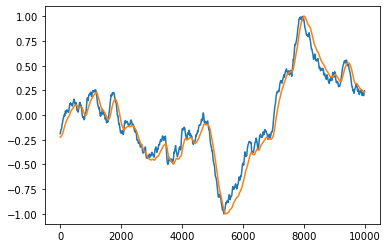

In [85]:
# effect of smoothing and delay in z(t)
rx = rescale(x,1,-1)
ry = rescale(y,1,-1)
rz = rescale(z,1,-1)
plt.plot(ry)
plt.plot(rz)
# plt.xlim([0,3000])

(0.0, 3000.0)

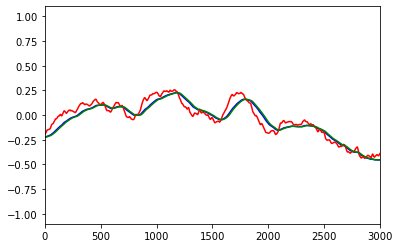

In [86]:
plt.plot(rx,'b')
plt.plot(ry,'r')
plt.plot(rz,'g')
plt.xlim([0,3000])

In [87]:
dms = range(-499,500)
mi_xx = [mi_quick(x,x,d) for d in dms]  
mi_xy = [mi_quick(x,y,d) for d in dms]

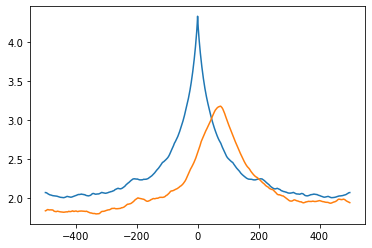

In [88]:
plt.plot(dms,mi_xx)
plt.plot(dms,mi_xy)

In [89]:
# shift in peak position
np.argmax(mi_xy)-np.argmax(mi_xx)

75